In [1]:
import pandas as pd
iris = pd.read_csv('iris.csv', index_col = 0)
iris.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa


In [2]:
iris.shape

(150, 5)

The Iris dataset contains 150 rows and 5 columns. There are 4 features.

In [3]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

There are 3 classes on the Species, they are:
1. Irs-setosa
2. Iris-versicolor
3. Iris-virginica

In [4]:
iris["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

#### Checking for Missing Values

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


The dataset does not contain any missing values.

#### Checking for Outliers

<AxesSubplot:>

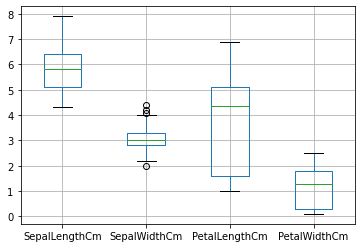

In [6]:
iris.boxplot(["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"])

There are outliers in SepalWidthCm variable.

In [7]:
import numpy as np
from scipy import stats

z = np.abs(stats.zscore(iris._get_numeric_data()))
outlier = iris[(z < 3).all(axis = 1)]
print(outlier.shape)

(149, 5)


In [8]:
pd_outlier = pd.DataFrame([])
pd_outlier["Notes"] = ["Not Outlier","Outlier"]
pd_outlier["Number of Observations"] = [outlier.shape[0], iris.shape[0]-outlier.shape[0]]
pd_outlier

,Notes,Number of Observations
0,Not Outlier,149
1,Outlier,1


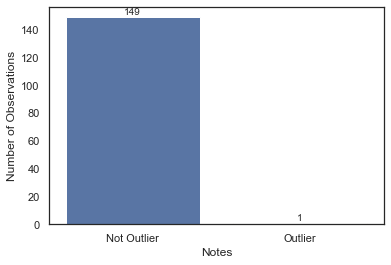

In [9]:
import seaborn as sns

sns.set(style = "white") #darkgrid, whitegrid, dark, white, ticks
plot = sns.barplot(x = "Notes", y = "Number of Observations", data = pd_outlier)

# Adding the Text labels
rects = plot.patches
labels = pd_outlier['Number of Observations']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    plot.text(rect.get_x() + rect.get_width()/2, height + 0.2, label, ha = 'center', va = 'bottom', fontsize = 10)

There is 1 multivariate outlier.

#### Overcoming The Existence of Outliers

In [10]:
from sklearn import preprocessing

features = iris.iloc[:,0:4]
features_normalized = preprocessing.normalize(features, norm = 'l2')
features_normalized = pd.DataFrame(features_normalized, columns = features.columns.tolist())
features_normalized

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639
...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699
146,0.729654,0.289545,0.579090,0.220054
147,0.716539,0.330710,0.573231,0.220474
148,0.674671,0.369981,0.587616,0.250281


<AxesSubplot:>

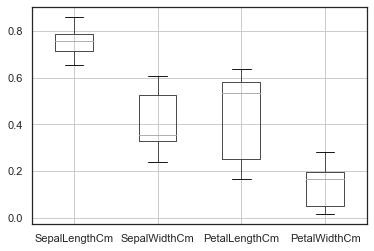

In [11]:
features_normalized.boxplot(["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"])

There are no longer outliers in any variable.

In [12]:
z = np.abs(stats.zscore(features_normalized._get_numeric_data()))
outlier = features_normalized[(z < 3).all(axis = 1)]
print(outlier.shape)

(150, 4)


In [13]:
pd_outlier = pd.DataFrame([])
pd_outlier["Notes"] = ["Not Outlier","Outlier"]
pd_outlier["Number of Observations"] = [outlier.shape[0], features_normalized.shape[0]-outlier.shape[0]]
pd_outlier

,Notes,Number of Observations
0,Not Outlier,150
1,Outlier,0


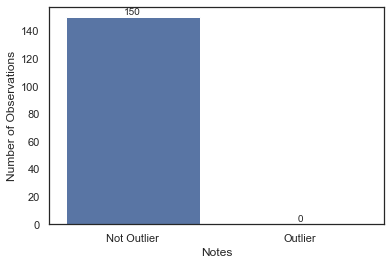

In [14]:
import seaborn as sns

sns.set(style = "white") #darkgrid, whitegrid, dark, white, ticks
plot = sns.barplot(x = "Notes", y = "Number of Observations", data = pd_outlier)

# Adding the Text labels
rects = plot.patches
labels = pd_outlier['Number of Observations']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    plot.text(rect.get_x() + rect.get_width()/2, height + 0.2, label, ha = 'center', va = 'bottom', fontsize = 10)

There are also no longer multivariate outliers.

#### Splitting The Data into Training and Testing

In [15]:
from sklearn.model_selection import train_test_split

x = features_normalized
y = iris.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [16]:
x_train.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,0.775771,0.607125,0.168646,0.033729
15,0.773811,0.597328,0.203635,0.054303
65,0.769454,0.356016,0.505313,0.160782


In [17]:
x_test.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,0.736599,0.338111,0.567543,0.144905
18,0.806828,0.537885,0.240633,0.042465
118,0.706006,0.238392,0.632655,0.210885


In [18]:
y_train.head(3)

Id
23        Iris-setosa
16        Iris-setosa
66    Iris-versicolor
Name: Species, dtype: object

In [19]:
y_test.head(3)

Id
74     Iris-versicolor
19         Iris-setosa
119     Iris-virginica
Name: Species, dtype: object

#### Classification using K-Nearest Neighbor

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

model = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', p = 2)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

cm = confusion_matrix(y_predict, y_test)
accuracy = accuracy_score(y_predict, y_test)

print(cm)
print('\n') # enter
print('The accuracy of the KNN is:', accuracy)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


The accuracy of the KNN is: 1.0


#### Tuning Parameter for K-Nearest Neighbor with GridSearch

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

model = KNeighborsClassifier()
scorer = make_scorer(accuracy_score, greater_is_better = True)
parameters = [{'n_neighbors': [3,5,7,9,11,13,15,17],
              'weights' : ['uniform', 'distance'],
              'p' : [1,2]}]

model_gscv = GridSearchCV(model, param_grid = parameters, scoring = scorer, cv = 5)
model_gscv.fit(x, y)
print('Best Parameter :', model_gscv.best_params_)
print('Best Score     :', model_gscv.best_score_)

Best Parameter : {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best Score     : 0.9800000000000001


In [22]:
cv_result = pd.DataFrame(model_gscv.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003189,7.468978e-04,0.005389,1.624768e-03,3,1,uniform,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}",1.0,1.0,0.966667,0.933333,1.000000,0.980000,0.026667,1
1,0.002593,7.983446e-04,0.001794,3.988046e-04,3,1,distance,"{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}",1.0,1.0,0.966667,0.933333,1.000000,0.980000,0.026667,1
2,0.002190,4.022205e-04,0.003004,1.758838e-05,3,2,uniform,"{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}",1.0,1.0,0.966667,0.933333,1.000000,0.980000,0.026667,1
3,0.002386,4.966486e-04,0.002003,1.563633e-05,3,2,distance,"{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}",1.0,1.0,0.966667,0.933333,1.000000,0.980000,0.026667,1
4,0.002197,3.964142e-04,0.001992,5.868004e-06,5,1,uniform,"{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}",1.0,1.0,0.933333,0.900000,1.000000,0.966667,0.042164,25
5,0.002392,4.879887e-04,0.001797,4.014778e-04,5,1,distance,"{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}",1.0,1.0,0.933333,0.933333,1.000000,0.973333,0.032660,9
6,0.002197,4.005268e-04,0.002583,4.844799e-04,5,2,uniform,"{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}",1.0,1.0,0.966667,0.933333,1.000000,0.980000,0.026667,1
7,0.002393,4.884609e-04,0.001995,1.168008e-07,5,2,distance,"{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}",1.0,1.0,0.966667,0.933333,1.000000,0.980000,0.026667,1
8,0.001994,5.519789e-07,0.002792,3.987551e-04,7,1,uniform,"{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}",1.0,1.0,0.933333,0.900000,0.966667,0.960000,0.038873,30
9,0.002194,3.990412e-04,0.001995,1.907349e-07,7,1,distance,"{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}",1.0,1.0,0.933333,0.933333,1.000000,0.973333,0.032660,9
